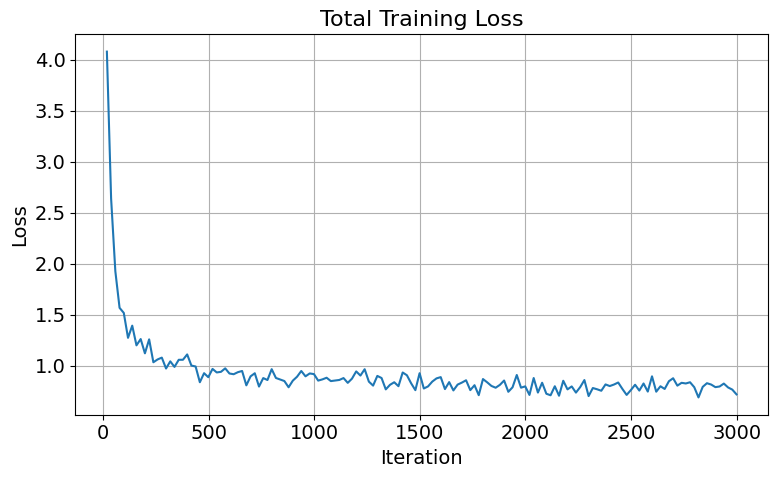

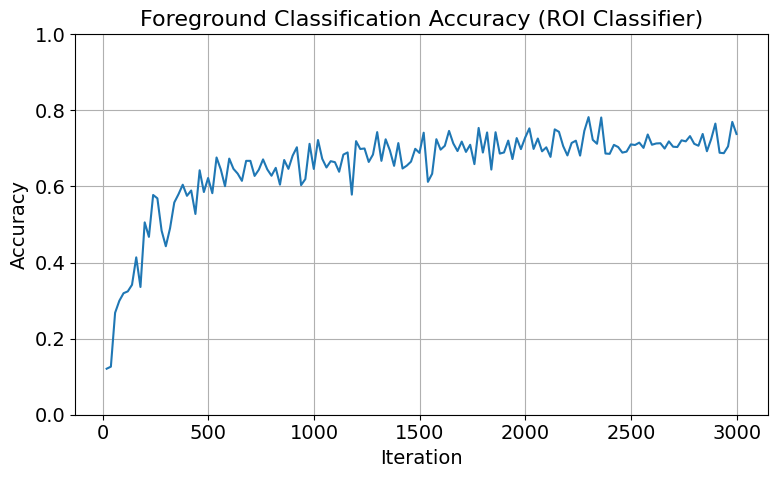

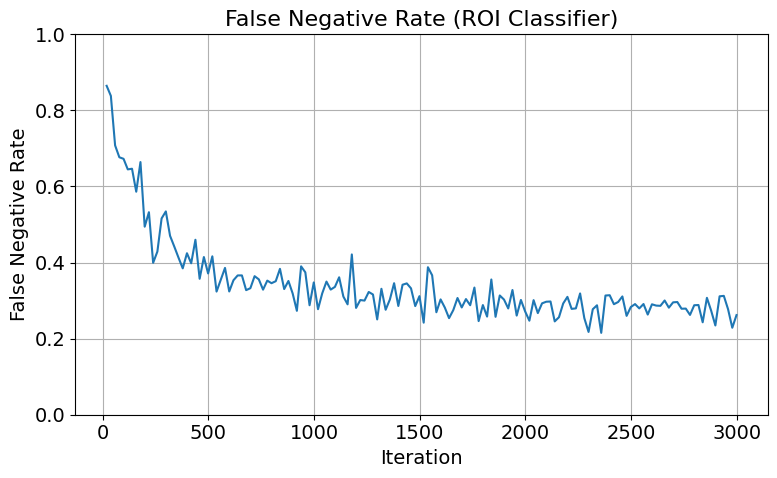

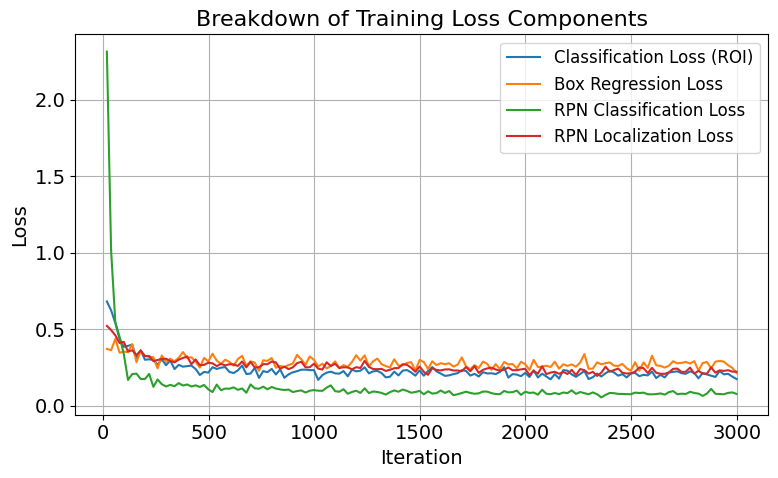

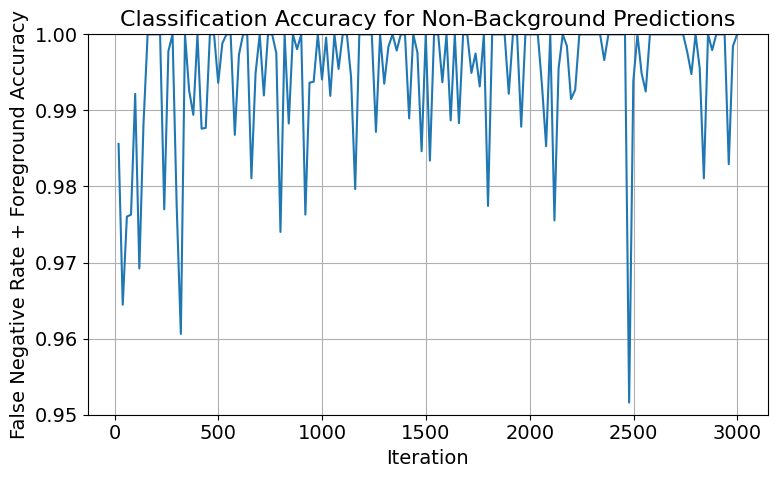

In [8]:
import json
import matplotlib.pyplot as plt

# ##########################################################
# Style settings — makes plots look more report-ready
# ##########################################################
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "figure.figsize": (8, 5)
})

# ##########################################################
# Load metrics
# ##########################################################
metrics_file = "metrics.json"

records = [json.loads(line) for line in open(metrics_file, 'r')]
iterations = [r['iteration'] for r in records]

# ##########################################################
# 1 — Total training loss
# ##########################################################
plt.figure()
plt.plot(iterations, [r['total_loss'] for r in records])
plt.title("Total Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# ##########################################################
# 2 — Foreground classification accuracy (Fast R-CNN head)
# ##########################################################
plt.figure()
plt.plot(iterations, [r['fast_rcnn/fg_cls_accuracy'] for r in records])
plt.title("Foreground Classification Accuracy (ROI Classifier)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# ##########################################################
# 3 — False negative rate of ROI classifier
# ##########################################################
plt.figure()
plt.plot(iterations, [r['fast_rcnn/false_negative'] for r in records])
plt.title("False Negative Rate (ROI Classifier)")
plt.xlabel("Iteration")
plt.ylabel("False Negative Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# ##########################################################
# 4 — Decomposed loss curves
# ##########################################################
plt.figure()
plt.plot(iterations, [r['loss_cls'] for r in records], label='Classification Loss (ROI)')
plt.plot(iterations, [r['loss_box_reg'] for r in records], label='Box Regression Loss')
plt.plot(iterations, [r['loss_rpn_cls'] for r in records], label='RPN Classification Loss')
plt.plot(iterations, [r['loss_rpn_loc'] for r in records], label='RPN Localization Loss')
plt.title("Breakdown of Training Loss Components")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ##########################################################
# 4 — False negative rate of ROI classifier + Foreground classification accuracy (Fast R-CNN head)
# ##########################################################
plt.figure()
plt.plot(iterations, [r['fast_rcnn/false_negative'] + r['fast_rcnn/fg_cls_accuracy'] for r in records])
plt.title("Classification Accuracy for Non-Background Predictions")
plt.xlabel("Iteration")
plt.ylabel("False Negative Rate + Foreground Accuracy")
plt.ylim(0.95, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import json
metrics_file = "metrics.json"

records = [json.loads(line) for line in open(metrics_file, 'r')]
iterations = [r['iteration'] for r in records]
print([r['fast_rcnn/fg_cls_accuracy'] + r['fast_rcnn/false_negative'] for r in records])

[0.9855997355903952, 0.9644607843137255, 0.976035614944058, 0.976303317535545, 0.9921800625594994, 0.9692267525247401, 0.9881882440476191, 1.0, 1.0, 1.0, 1.0, 0.9769997829597663, 0.997787610619469, 1.0, 0.9773821655277709, 0.9606181635002878, 1.0, 0.9926105946527042, 0.9894221844059405, 1.0, 0.9875981810665564, 0.9877049180327868, 1.0, 1.0, 0.9936233112754417, 0.9988195018297722, 1.0, 1.0, 0.9867816091954023, 0.9973299050632911, 1.0, 1.0, 0.9810794044665013, 0.9948717948717949, 1.0, 0.9919678714859437, 1.0, 1.0, 0.9975105967839601, 0.974025974025974, 1.0, 0.9882768361581922, 1.0, 0.998046875, 1.0, 0.9762997989766082, 0.9936440677966102, 0.9937751279239766, 1.0, 0.9940711462450593, 0.999588631264024, 0.991907909733303, 1.0, 0.9954545454545455, 1.0, 1.0, 0.994433970733459, 0.9796597810888473, 1.0, 1.0, 1.0, 1.0, 0.9871794871794872, 1.0, 0.9935097025005766, 0.9983579638752053, 1.0, 0.9978723404255319, 1.0, 1.0, 0.9889564043209876, 1.0, 0.9975941639072847, 0.9846352867727454, 1.0, 0.983405